In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
df = pd.read_csv("input/price4.csv")
df.head()

,x5202,x7272,x4927,x4502
0,55,682,2460,3595
1,56,672,2543,3575
2,56,668,2544,3570
3,57,674,2500,3500
4,60,711,2535,3545


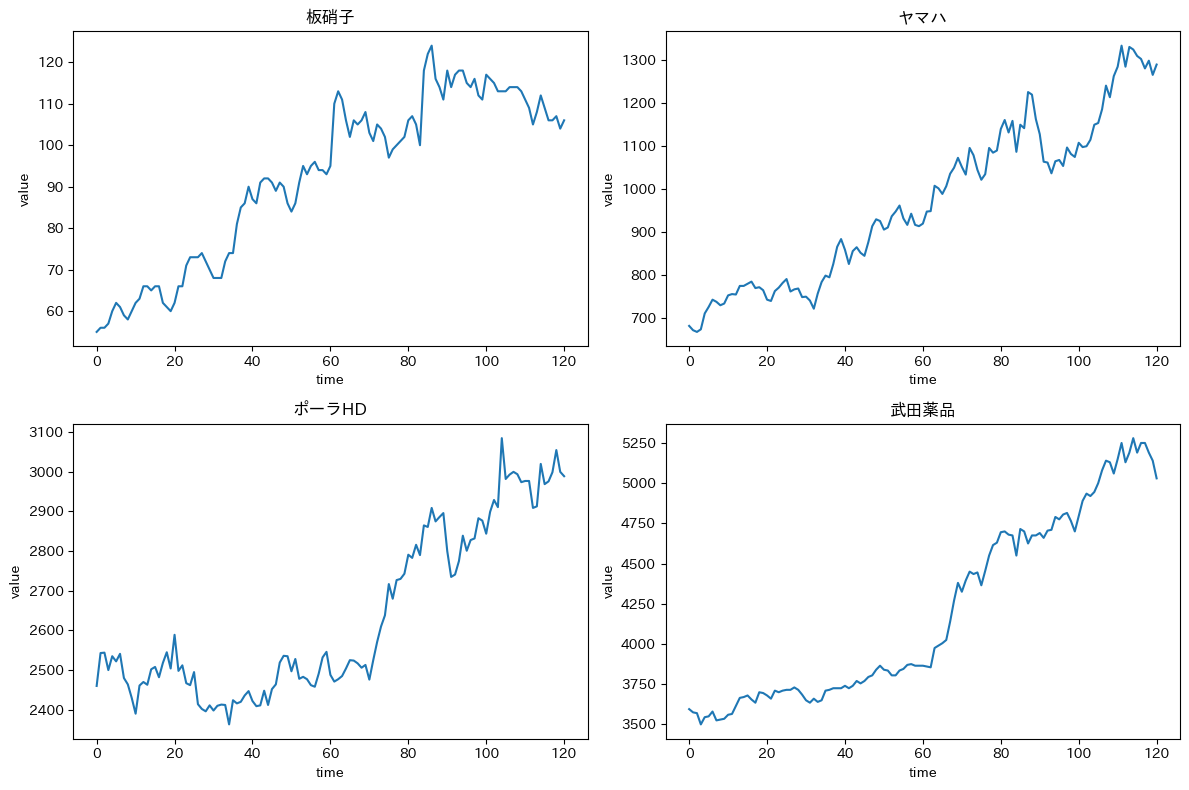

In [3]:

def myplot():
    name_map = {
        "x5202": "板硝子",
        "x4927": "ポーラHD",
        "x7272": "ヤマハ",
        "x4502": "武田薬品",
    }
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    for i, col in enumerate(df.columns):
        ax = axs[i // 2, i % 2]
        ax.plot(df[col])
        ax.set_title(name_map[col])
        ax.set_xlabel("time")
        ax.set_ylabel("value")
    
    plt.tight_layout()
    plt.show()
myplot()

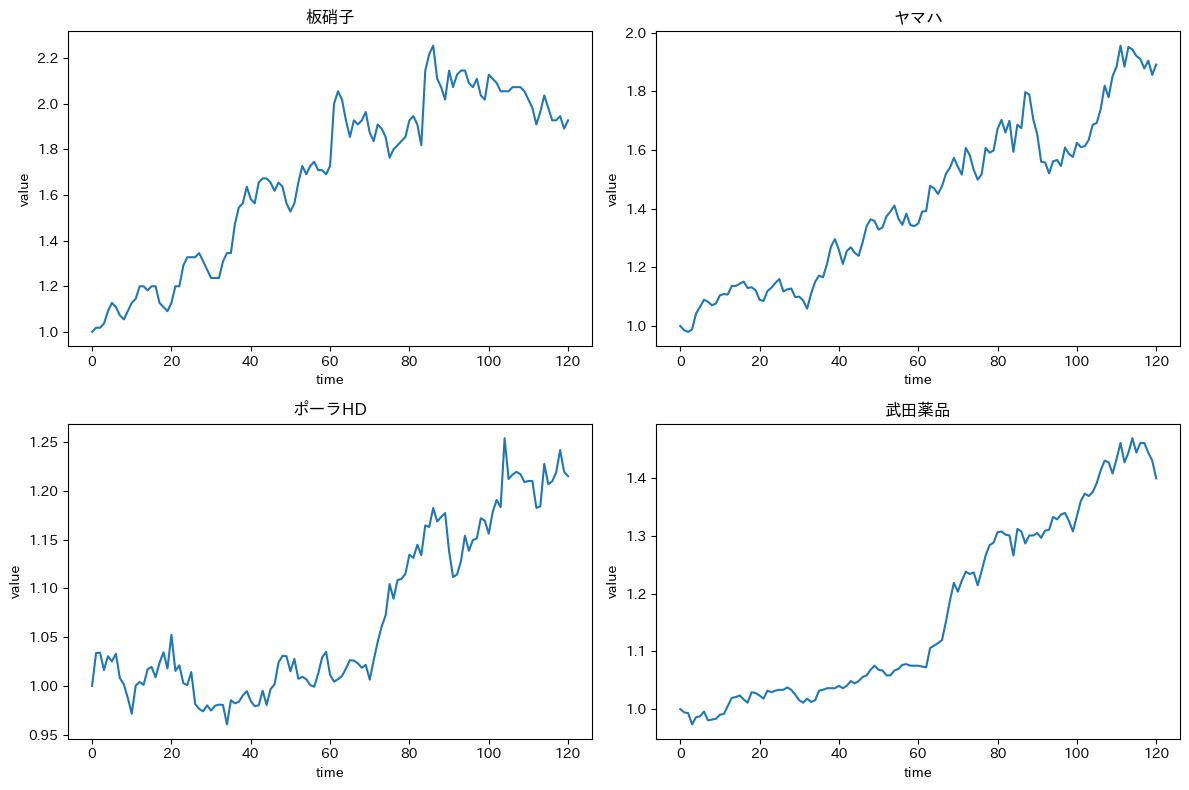

In [4]:

def rate():
    for c in df.columns:
        df[c] = df[c] / df[c][0]
rate()
myplot()

In [5]:
df = pd.read_csv("input/price4.csv")


In [6]:
import numpy as np


def logdiff():
    for col in df.columns:
        df[f"{col}_log"] = np.log(df[col])
        df[f"{col}_logdiff"] = df[f"{col}_log"].diff()

logdiff()
df.head()

,x5202,x7272,x4927,x4502,x5202_log,x5202_logdiff,x7272_log,x7272_logdiff,x4927_log,x4927_logdiff,x4502_log,x4502_logdiff
0,55,682,2460,3595,4.007333,NaN,6.525030,NaN,7.807917,NaN,8.187299,NaN
1,56,672,2543,3575,4.025352,0.018019,6.510258,-0.014771,7.841100,0.033183,8.181720,-0.005579
2,56,668,2544,3570,4.025352,0.000000,6.504288,-0.005970,7.841493,0.000393,8.180321,-0.001400
3,57,674,2500,3500,4.043051,0.017700,6.513230,0.008942,7.824046,-0.017447,8.160518,-0.019803
4,60,711,2535,3545,4.094345,0.051293,6.566672,0.053442,7.837949,0.013903,8.173293,0.012775


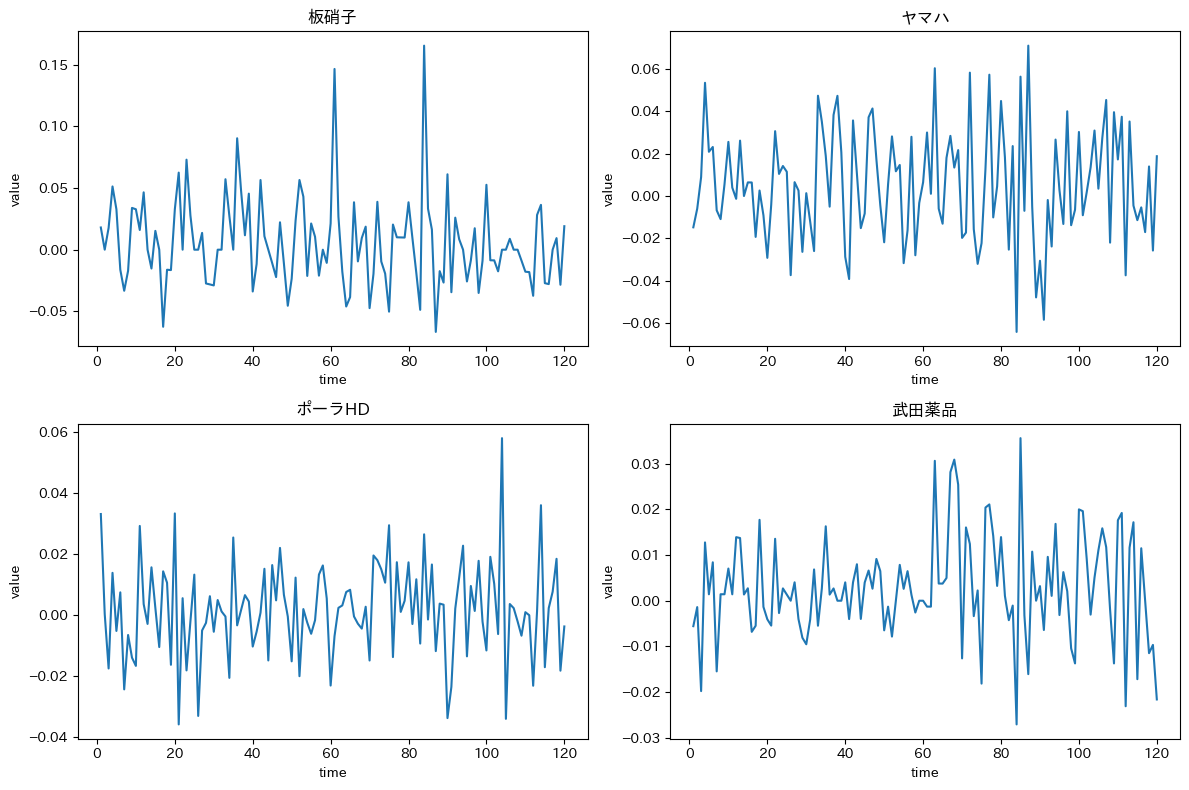

In [7]:
name_map = {
    "x5202_logdiff": "板硝子",
    "x4927_logdiff": "ポーラHD",
    "x7272_logdiff": "ヤマハ",
    "x4502_logdiff": "武田薬品",
}
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(df.columns):
    j = (i - 4) // 2
    if "_logdiff" in col:
        ax = axs[j // 2, j % 2]
        ax.plot(df[col])
        ax.set_title(name_map[col])
        ax.set_xlabel("time")
        ax.set_ylabel("value")

plt.tight_layout()
plt.show()

# ポイント
- 縦軸のスケールを一致させ、変動の大きさを比較した
    - log & diff

In [8]:
df = pd.read_csv("input/return4.csv")
df.head()

,x5202,x7272,x4927,x4502
0,1.801851,-1.477132,3.318314,-0.557882
1,0.000000,-0.597017,0.039316,-0.139958
2,1.769958,0.894194,-1.744691,-1.980263
3,5.129329,5.344232,1.390291,1.277519
4,3.278982,2.087759,-0.514140,0.140944


In [9]:
df["x4502"].mean()

0.2798966607821984

In [10]:
df["x4502"].std()

1.1339557453263471

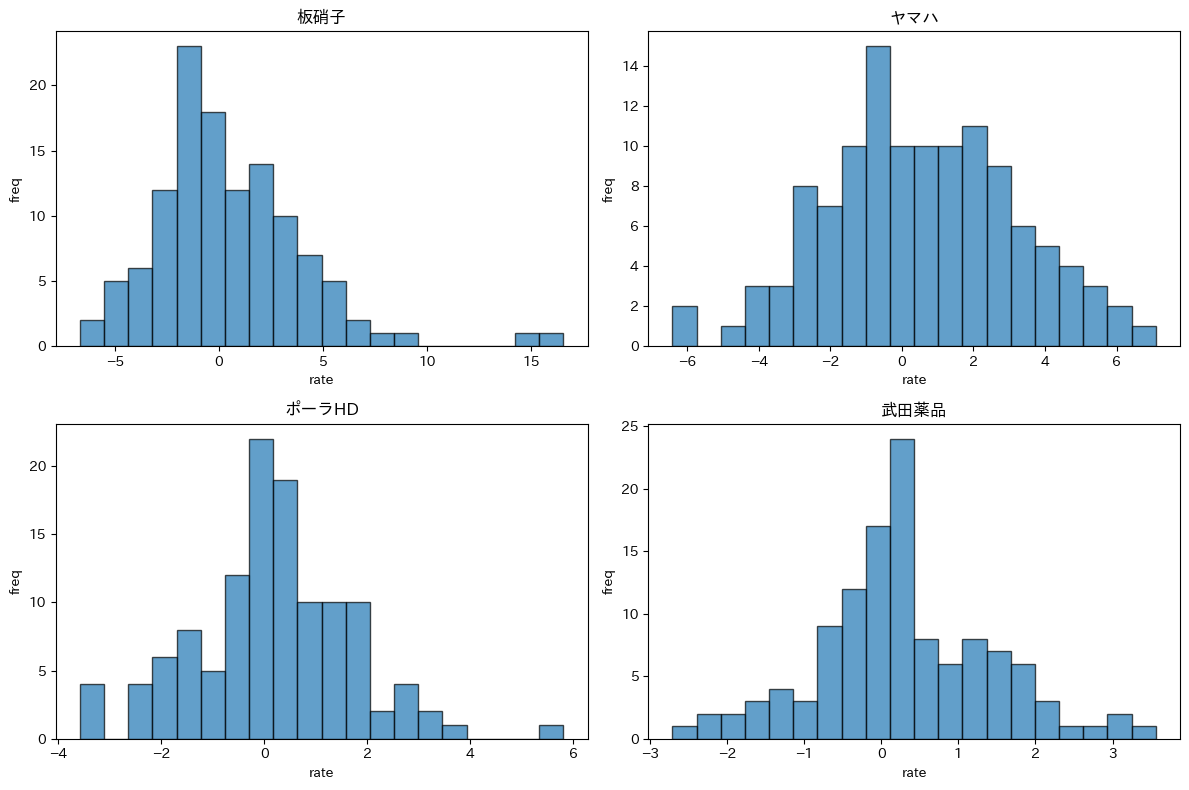

In [11]:
def myplot2():
    name_map = {
        "x5202": "板硝子",
        "x4927": "ポーラHD",
        "x7272": "ヤマハ",
        "x4502": "武田薬品",
    }
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    for i, col in enumerate(df.columns):
        ax = axs[i // 2, i % 2]
        ax.hist(df[col], bins=20, alpha=0.7, edgecolor="black")
        ax.set_title(name_map[col])
        ax.set_xlabel("rate")
        ax.set_ylabel("freq")
    
    plt.tight_layout()
    plt.show()
myplot2()

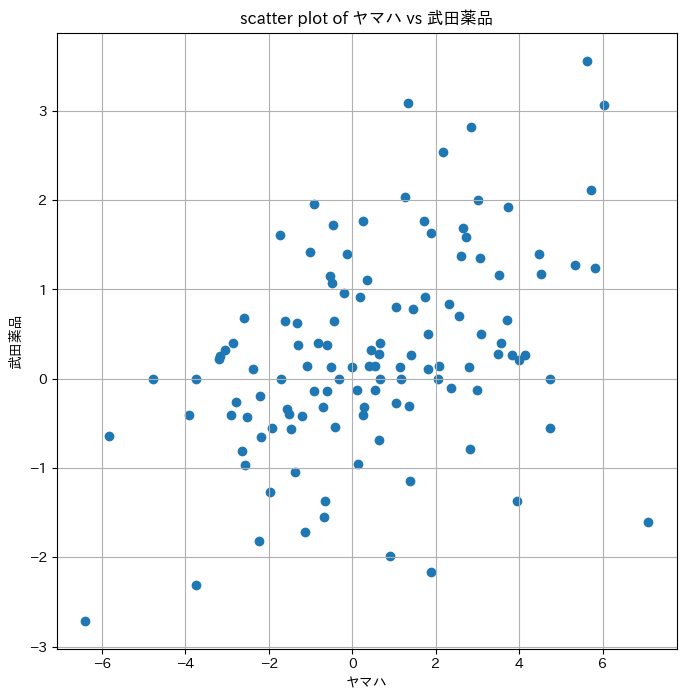

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(df["x7272"], df["x4502"])
plt.title("scatter plot of ヤマハ vs 武田薬品")
plt.xlabel("ヤマハ")
plt.ylabel("武田薬品")
plt.grid(True)
plt.show()

In [13]:
cor = np.corrcoef(df["x7272"], df["x4502"])[0, 1]
cor

0.4145995883295086

In [14]:
from scipy import stats
slope, intercept, r_val, p_val, std_err = stats.linregress(df["x7272"], df["x4502"])
slope, intercept, r_val, p_val, std_err

(0.1781798517055956,
 0.18525823817702375,
 0.41459958832950866,
 2.503664952974681e-06,
 0.036002445231833054)

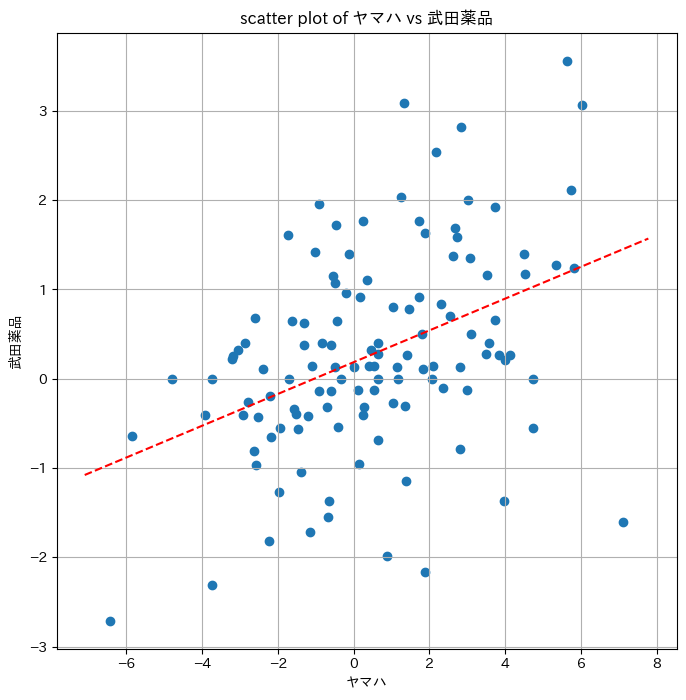

In [15]:
plt.figure(figsize=(8, 8))

plt.scatter(df["x7272"], df["x4502"])
plt.title("scatter plot of ヤマハ vs 武田薬品")
plt.xlabel("ヤマハ")
plt.ylabel("武田薬品")

x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, "--", color="red")

plt.grid(True)
plt.show()

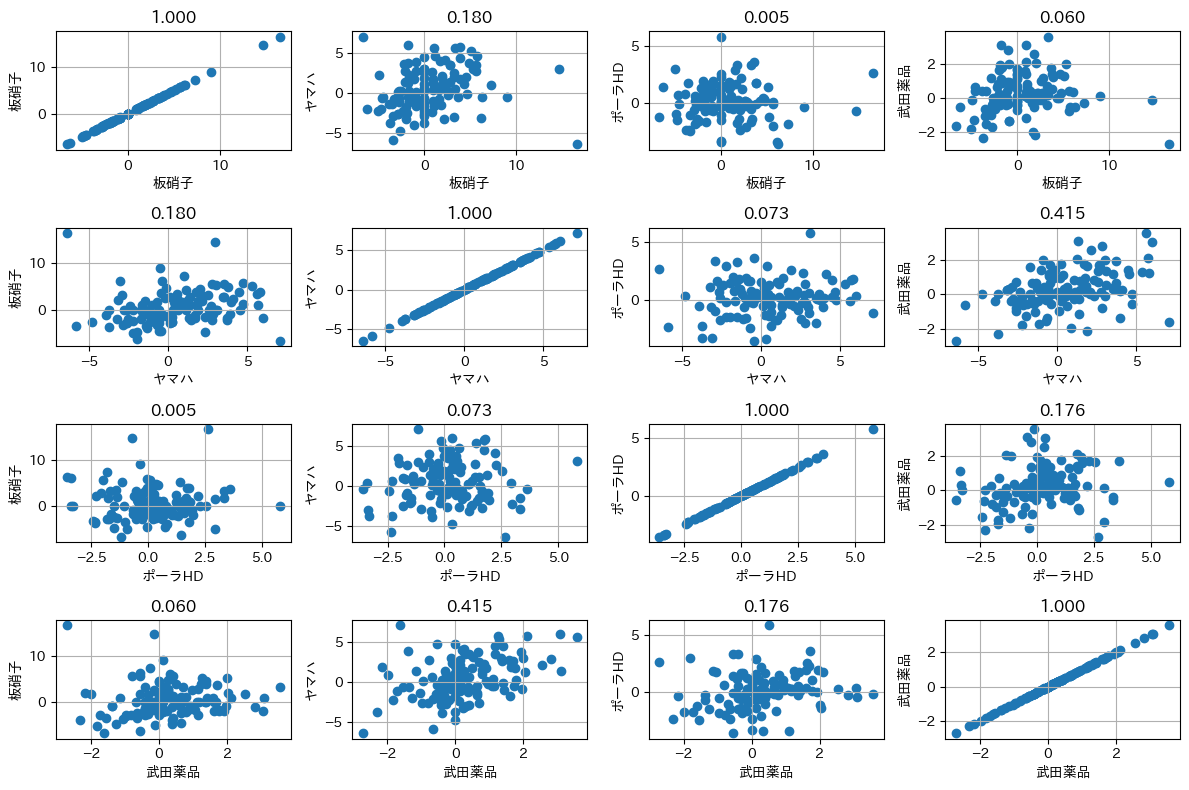

In [16]:
name_map = {
    "x5202": "板硝子",
    "x4927": "ポーラHD",
    "x7272": "ヤマハ",
    "x4502": "武田薬品",
}
fig, axs = plt.subplots(4, 4, figsize=(12, 8))
for i, coli in enumerate(df.columns):
    for j, colj in enumerate(df.columns):
        ax = axs[i, j]
        ax.scatter(df[coli], df[colj])
        cor = np.corrcoef(df[coli], df[colj])[0, 1]
        ax.set_title(f"{cor:0.3f}")
        ax.set_xlabel(name_map[coli])
        ax.set_ylabel(name_map[colj])
        ax.grid(True)
plt.tight_layout()
plt.show()

In [17]:
cm = df.corr()
cm

,x5202,x7272,x4927,x4502
x5202,1.000000,0.179624,0.004770,0.060213
x7272,0.179624,1.000000,0.072823,0.414600
x4927,0.004770,0.072823,1.000000,0.175989
x4502,0.060213,0.414600,0.175989,1.000000
